In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/social.csv")

In [4]:
# shape
print(data.shape)

(400, 3)


In [5]:
# head
print(data.head(20))

    Age  EstimatedSalary  Purchased
0    19            19000          0
1    35            20000          0
2    26            43000          0
3    27            57000          0
4    19            76000          0
5    27            58000          0
6    27            84000          0
7    32           150000          1
8    25            33000          0
9    35            65000          0
10   26            80000          0
11   26            52000          0
12   20            86000          0
13   32            18000          0
14   18            82000          0
15   29            80000          0
16   47            25000          1
17   45            26000          1
18   46            28000          1
19   48            29000          1


In [6]:
# descriptions
print(data.describe())

              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000


In [20]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [21]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

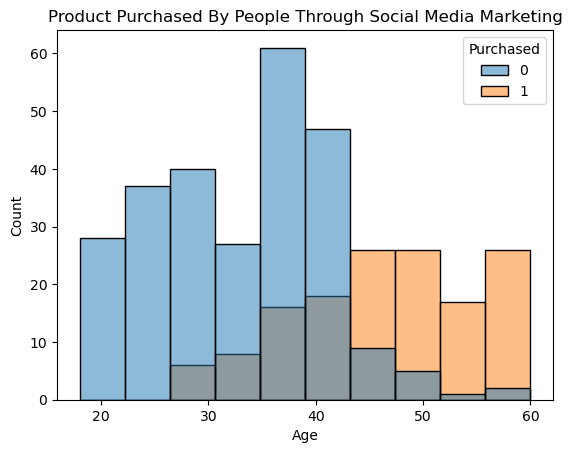

In [9]:
plt.title("Product Purchased By People Through Social Media Marketing")
sns.histplot(x="Age", hue="Purchased", data=data)
plt.show()

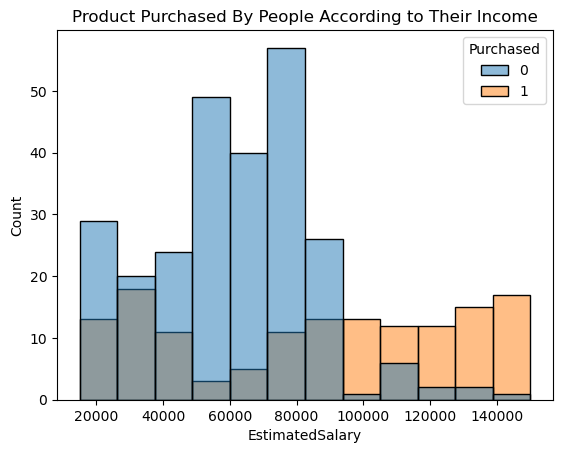

In [10]:
plt.title("Product Purchased By People According to Their Income")
sns.histplot(x="EstimatedSalary", hue="Purchased", data=data)
plt.show()

In [11]:
x = np.array(data[["Age", "EstimatedSalary"]])
y = np.array(data[["Purchased"]]).ravel()
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=42)

In [14]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [15]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, xtrain,ytrain, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.638889 (0.000000)
LDA: 0.836111 (0.047222)
KNN: 0.808333 (0.084665)
CART: 0.841667 (0.048193)
NB: 0.880556 (0.041295)
SVM: 0.663889 (0.036111)


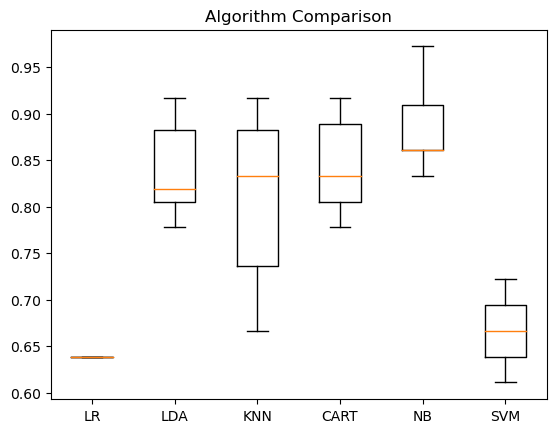

In [16]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [18]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [19]:
# Evaluate predictions
print(accuracy_score(ytest, predictions))
print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, predictions))


0.925
[[25  2]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.86      0.92      0.89        13

    accuracy                           0.93        40
   macro avg       0.91      0.92      0.92        40
weighted avg       0.93      0.93      0.93        40

